In [1]:
# install.packages(c("tidyverse", "caret", "ggplot2","pROC", "e1071", "ROCR", "data.table", "scales", "PRROC" ))
# # install.packages("DMwR", repos = "http://cran.us.r-project.org")
# install.packages("kernlab")


In [2]:
# Import thư viện
library(tidyverse)
library(caret)
library(ggplot2)
library(pROC)
library(e1071)           # Cho SVM
library(ROCR)
# library(DMwR)            # SMOTE
library(data.table)
library(scales)
library(PRROC)
library(kernlab)

Warning message:
"package 'tidyverse' was built under R version 4.5.1"
Warning message:
"package 'ggplot2' was built under R version 4.5.1"
── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.2     ✔ tibble    3.2.1
✔ lubridate 1.9.4     ✔ tidyr     1.3.1
✔ purrr     1.0.4     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
Loading required package: lattice


Attaching package: 'caret'


The following object is masked from 'package:purrr':

    lift


Type 'citation("pROC")' for a citation.


Attaching package: 'pROC'


The following objects are masked from 'package:stats':

    cov, smooth, var


Warning message:
"package 'ROCR' was built under R versio

In [3]:
# Đọc dữ liệu
df <- read_csv("D:/Khang/FPT semester/semester_5/DSR301m/project_assignment/attempt/breast-cancer.csv")

Rows: 569 Columns: 32
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (1): diagnosis
dbl (31): id, radius_mean, texture_mean, perimeter_mean, area_mean, smoothne...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


In [4]:
# Kiểm tra dữ liệu
head(df)
summary(df)
str(df)
colSums(is.na(df))

id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,⋯,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave_points_worst,symmetry_worst,fractal_dimension_worst
<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,⋯,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,⋯,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,⋯,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,⋯,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,⋯,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678
843786,M,12.45,15.70,82.57,477.1,0.12780,0.17000,0.1578,0.08089,⋯,15.47,23.75,103.40,741.6,0.1791,0.5249,0.5355,0.1741,0.3985,0.12440


       id             diagnosis          radius_mean      texture_mean  
 Min.   :     8670   Length:569         Min.   : 6.981   Min.   : 9.71  
 1st Qu.:   869218   Class :character   1st Qu.:11.700   1st Qu.:16.17  
 Median :   906024   Mode  :character   Median :13.370   Median :18.84  
 Mean   : 30371831                      Mean   :14.127   Mean   :19.29  
 3rd Qu.:  8813129                      3rd Qu.:15.780   3rd Qu.:21.80  
 Max.   :911320502                      Max.   :28.110   Max.   :39.28  
 perimeter_mean     area_mean      smoothness_mean   compactness_mean 
 Min.   : 43.79   Min.   : 143.5   Min.   :0.05263   Min.   :0.01938  
 1st Qu.: 75.17   1st Qu.: 420.3   1st Qu.:0.08637   1st Qu.:0.06492  
 Median : 86.24   Median : 551.1   Median :0.09587   Median :0.09263  
 Mean   : 91.97   Mean   : 654.9   Mean   :0.09636   Mean   :0.10434  
 3rd Qu.:104.10   3rd Qu.: 782.7   3rd Qu.:0.10530   3rd Qu.:0.13040  
 Max.   :188.50   Max.   :2501.0   Max.   :0.16340   Max.   :0.

spc_tbl_ [569 × 32] (S3: spec_tbl_df/tbl_df/tbl/data.frame)
 $ id                     : num [1:569] 842302 842517 84300903 84348301 84358402 ...
 $ diagnosis              : chr [1:569] "M" "M" "M" "M" ...
 $ radius_mean            : num [1:569] 18 20.6 19.7 11.4 20.3 ...
 $ texture_mean           : num [1:569] 10.4 17.8 21.2 20.4 14.3 ...
 $ perimeter_mean         : num [1:569] 122.8 132.9 130 77.6 135.1 ...
 $ area_mean              : num [1:569] 1001 1326 1203 386 1297 ...
 $ smoothness_mean        : num [1:569] 0.1184 0.0847 0.1096 0.1425 0.1003 ...
 $ compactness_mean       : num [1:569] 0.2776 0.0786 0.1599 0.2839 0.1328 ...
 $ concavity_mean         : num [1:569] 0.3001 0.0869 0.1974 0.2414 0.198 ...
 $ concave_points_mean    : num [1:569] 0.1471 0.0702 0.1279 0.1052 0.1043 ...
 $ symmetry_mean          : num [1:569] 0.242 0.181 0.207 0.26 0.181 ...
 $ fractal_dimension_mean : num [1:569] 0.0787 0.0567 0.06 0.0974 0.0588 ...
 $ radius_se              : num [1:569] 1.095 0.543 0.7

id               diagnosis             radius_mean 
                      0                       0                       0 
           texture_mean          perimeter_mean               area_mean 
                      0                       0                       0 
        smoothness_mean        compactness_mean          concavity_mean 
                      0                       0                       0 
    concave_points_mean           symmetry_mean  fractal_dimension_mean 
                      0                       0                       0 
              radius_se              texture_se            perimeter_se 
                      0                       0                       0 
                area_se           smoothness_se          compactness_se 
                      0                       0                       0 
           concavity_se       concave_points_se             symmetry_se 
                      0                       0                       0 
   fractal_dimension_se            radius_worst           texture_worst 
                      0                       0                       0 
        perimeter_worst              area_worst        smoothness_worst 
                      0                       0                       0 
      compactness_worst         concavity_worst    concave_points_worst 
                      0                       0                       0 
         symmetry_worst fractal_dimension_worst 
                      0                       0

In [5]:
# Đổi tên cột diagnosis thành label
df$label <- df$diagnosis
df$diagnosis <- NULL

In [6]:
head(df)

id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,symmetry_mean,⋯,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave_points_worst,symmetry_worst,fractal_dimension_worst,label
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
842302,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,⋯,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,M
842517,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,⋯,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,M
84300903,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,⋯,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,M
84348301,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,⋯,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,M
84358402,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,⋯,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,M
843786,12.45,15.70,82.57,477.1,0.12780,0.17000,0.1578,0.08089,0.2087,⋯,23.75,103.40,741.6,0.1791,0.5249,0.5355,0.1741,0.3985,0.12440,M


In [7]:
# Đếm số lượng mỗi lớp
table(df$label)


  B   M 
357 212 

In [8]:
# Lựa chọn đặc trưng
# selected_features <- c(
#   "radius_mean", "perimeter_mean", "area_mean", "concavity_mean",
#   "concave_points_mean", "compactness_mean", "radius_worst",
#   "perimeter_worst", "area_worst", "concave_points_worst"
# )

selected_features <- c(
  'radius_mean', 'perimeter_mean', 'compactness_mean', 'area_mean', 'concavity_mean',
  'concavity_se', 'perimeter_se',  'radius_worst'
)
df <- df[, c(selected_features, "label"), with=FALSE]


In [9]:
# Mã hóa nhãn
df$label <- as.factor(ifelse(df$label == "M", 1, 0))


In [10]:
# Chuẩn hóa dữ liệu
# Get all column names
all_cols = colnames(df)
# Exclude the 'label' column from the list of column names
features_for_scaling = setdiff(all_cols, "label")
# Select only the feature columns for scaling
scaler <- preProcess(df[, features_for_scaling, with=FALSE], method = c("center", "scale"))
df_scaled <- predict(scaler, df)


In [11]:
# Lưu scaler
saveRDS(scaler, "scaler_model.rds")

In [12]:
# Phân chia tập train/test
set.seed(42)
trainIndex <- createDataPartition(df_scaled$label, p = 0.8, list = FALSE)
train_data <- df_scaled[trainIndex, ]
test_data <- df_scaled[-trainIndex, ]

In [13]:
# # Cân bằng dữ liệu bằng SMOTE
# train_data$label <- as.factor(train_data$label)
# train_data_smote <- SMOTE(label ~ ., data = train_data)


In [14]:
# # Xác nhận lại dữ liệu sau SMOTE
# table(train_data_smote$label)

In [15]:
# Huấn luyện mô hình SVM với xác suất
svm_model <- svm(label ~ ., data = train_data, kernel = "radial", probability = TRUE)


In [16]:
# Lưu mô hình SVM
saveRDS(svm_model, "svm_model.rds")

In [17]:
# Dự đoán trên test set
pred <- predict(svm_model, test_data %>% select(-label))


In [18]:
print(pred)

  1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18  19  20 
  1   1   1   1   1   1   1   0   1   0   1   0   1   0   1   1   1   1   1   0 
 21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36  37  38  39  40 
  0   1   0   0   1   0   0   0   0   0   0   1   0   1   0   1   0   1   1   0 
 41  42  43  44  45  46  47  48  49  50  51  52  53  54  55  56  57  58  59  60 
  0   1   0   1   0   0   0   0   1   1   1   1   0   0   0   0   0   1   0   0 
 61  62  63  64  65  66  67  68  69  70  71  72  73  74  75  76  77  78  79  80 
  0   0   0   0   1   1   0   0   1   1   0   0   0   0   0   0   0   0   1   0 
 81  82  83  84  85  86  87  88  89  90  91  92  93  94  95  96  97  98  99 100 
  0   0   0   0   0   0   1   1   1   0   0   1   0   0   0   0   0   0   0   0 
101 102 103 104 105 106 107 108 109 110 111 112 113 
  0   1   1   0   0   1   0   0   0   0   0   1   1 
Levels: 0 1


In [19]:
# Dự đoán xác suất
pred_prob <- attr(predict(svm_model, test_data %>% select(-label), probability = TRUE), "probabilities")
prob_class_1 <- pred_prob[,2]

In [20]:
print(pred_prob)
print(prob_class_1)

              1           0
1   0.979908696 0.020091304
2   0.993680145 0.006319855
3   0.995446859 0.004553141
4   0.992661531 0.007338469
5   0.998403189 0.001596811
6   0.992056283 0.007943717
7   0.627856769 0.372143231
8   0.352135403 0.647864597
9   0.911094384 0.088905616
10  0.019709036 0.980290964
11  0.997790927 0.002209073
12  0.018352800 0.981647200
13  0.741141874 0.258858126
14  0.068107500 0.931892500
15  0.990552895 0.009447105
16  0.641317895 0.358682105
17  0.741725947 0.258274053
18  0.995506816 0.004493184
19  0.995973062 0.004026938
20  0.556447961 0.443552039
21  0.014557831 0.985442169
22  0.983076841 0.016923159
23  0.017782018 0.982217982
24  0.013942399 0.986057601
25  0.995904420 0.004095580
26  0.350551898 0.649448102
27  0.019725292 0.980274708
28  0.017125564 0.982874436
29  0.093911092 0.906088908
30  0.012887492 0.987112508
31  0.068949990 0.931050010
32  0.992273759 0.007726241
33  0.012140641 0.987859359
34  0.984450467 0.015549533
35  0.063403143 0.93

In [21]:
# Accuracy
mean(pred == test_data$label)


[1] 0.9380531

In [22]:
# Cross-validation score
set.seed(42)
cv_result <- train(label ~ ., data = train_data, method = "svmRadial",
                   trControl = trainControl(method = "cv", number = 5))
cv_result$results$Accuracy

[1] 0.9145007 0.9232203 0.9341854

In [23]:
# Confusion matrix
confusionMatrix(pred, as.factor(test_data$label))

Confusion Matrix and Statistics

          Reference
Prediction  0  1
         0 67  3
         1  4 39
                                          
               Accuracy : 0.9381          
                 95% CI : (0.8765, 0.9747)
    No Information Rate : 0.6283          
    P-Value [Acc > NIR] : 1.718e-14       
                                          
                  Kappa : 0.868           
                                          
 Mcnemar's Test P-Value : 1               
                                          
            Sensitivity : 0.9437          
            Specificity : 0.9286          
         Pos Pred Value : 0.9571          
         Neg Pred Value : 0.9070          
             Prevalence : 0.6283          
         Detection Rate : 0.5929          
   Detection Prevalence : 0.6195          
      Balanced Accuracy : 0.9361          
                                          
       'Positive' Class : 0               
                                    

In [24]:
# Classification report (precision, recall, F1)
confusionMatrix(pred, as.factor(test_data$label))


Confusion Matrix and Statistics

          Reference
Prediction  0  1
         0 67  3
         1  4 39
                                          
               Accuracy : 0.9381          
                 95% CI : (0.8765, 0.9747)
    No Information Rate : 0.6283          
    P-Value [Acc > NIR] : 1.718e-14       
                                          
                  Kappa : 0.868           
                                          
 Mcnemar's Test P-Value : 1               
                                          
            Sensitivity : 0.9437          
            Specificity : 0.9286          
         Pos Pred Value : 0.9571          
         Neg Pred Value : 0.9070          
             Prevalence : 0.6283          
         Detection Rate : 0.5929          
   Detection Prevalence : 0.6195          
      Balanced Accuracy : 0.9361          
                                          
       'Positive' Class : 0               
                                    

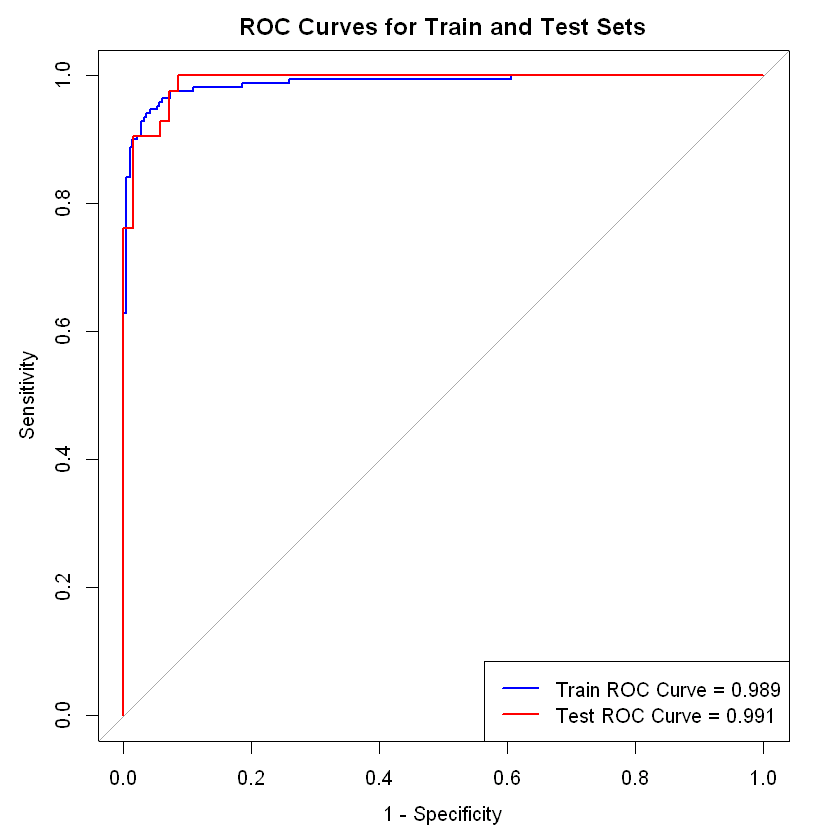

In [25]:
# Dự đoán xác suất trên tập train
# Explicitly select columns for prediction on train data, excluding 'label'
feature_cols_train <- setdiff(colnames(train_data), "label")
pred_prob_train <- attr(predict(svm_model, train_data[, feature_cols_train, with=FALSE], probability = TRUE), "probabilities")
prob_class_1_train <- pred_prob_train[,2]


# Dự đoán xác suất trên tập test (already have prob_class_1)


# Calculate ROC objects for both train and test sets
roc_obj_train <- roc(response = train_data$label, predictor = prob_class_1_train, levels = c(0, 1), direction = ">")
roc_obj_test <- roc(response = test_data$label, predictor = prob_class_1, levels = c(0, 1), direction = ">")

# Plot ROC Curves for Train and Test Sets
plot(roc_obj_train, col = "blue", main = "ROC Curves for Train and Test Sets", legacy.axes = TRUE)
lines(roc_obj_test, col = "red")

# Thêm chú thích AUC
legend("bottomright",
       legend = c(paste("Train ROC Curve =", round(auc(roc_obj_train), 3)),
                  paste("Test ROC Curve =", round(auc(roc_obj_test), 3))),
       col = c("blue", "red"),
       lwd = 2)

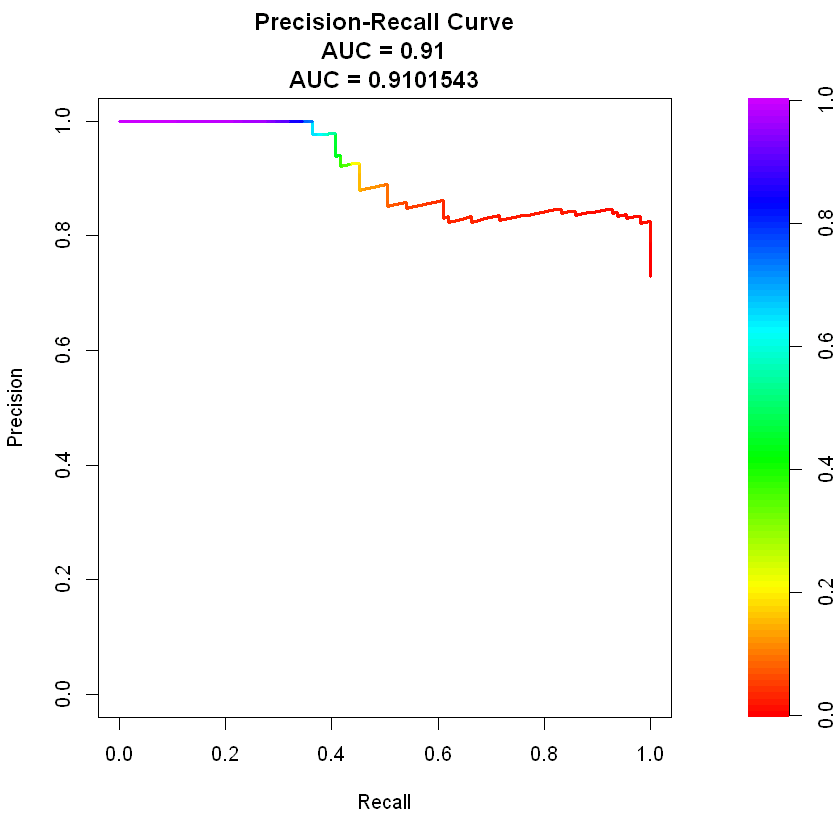

In [26]:
# Chuyển nhãn sang numeric nếu chưa
true_labels <- as.numeric(as.character(test_data$label))

# Tính PR curve với class 1 là positive
# We need to provide scores for both class 1 and class 0 when curve=TRUE
pr <- pr.curve(scores.class1 = prob_class_1, scores.class0 = 1 - prob_class_1, weights.class1 = true_labels, curve = TRUE)

# Vẽ PR Curve đúng
plot(pr, main = paste0("Precision-Recall Curve\nAUC = ", round(pr$auc.integral, 3)))


Attaching package: 'reshape2'


The following objects are masked from 'package:data.table':

    dcast, melt


The following object is masked from 'package:tidyr':

    smiths




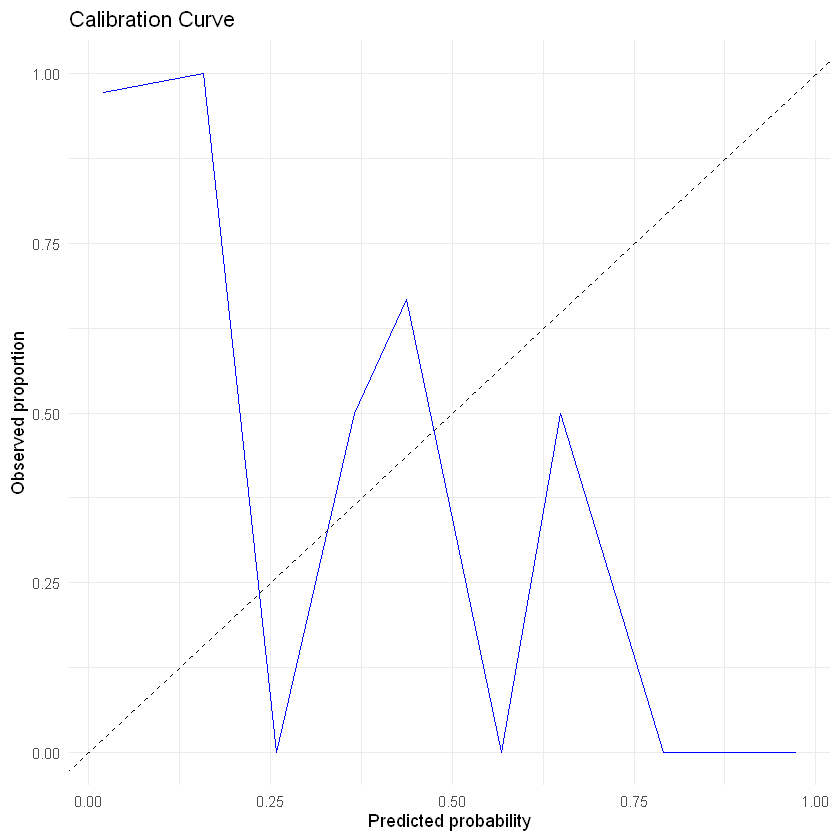

In [27]:
# Calibration curve
library(reshape2)
test_data$prob <- prob_class_1
test_data$bin <- cut(test_data$prob, breaks = seq(0, 1, by = 0.1), include.lowest = TRUE)
calib <- test_data %>%
  group_by(bin) %>%
  summarise(mean_pred = mean(prob), observed = mean(as.numeric(as.character(label))))

ggplot(calib, aes(x = mean_pred, y = observed)) +
  geom_line(color = "blue") +
  geom_abline(slope = 1, intercept = 0, linetype = "dashed") +
  labs(x = "Predicted probability", y = "Observed proportion", title = "Calibration Curve") +
  theme_minimal()


Warning message in simpleLoess(y, x, w, span, degree = degree, parametric = parametric, :
"span too small.   fewer data values than degrees of freedom."
Warning message in simpleLoess(y, x, w, span, degree = degree, parametric = parametric, :
"pseudoinverse used at 0.026474"
Warning message in simpleLoess(y, x, w, span, degree = degree, parametric = parametric, :
"neighborhood radius 0.44333"
Warning message in simpleLoess(y, x, w, span, degree = degree, parametric = parametric, :
"reciprocal condition number  0"
Warning message in simpleLoess(y, x, w, span, degree = degree, parametric = parametric, :
"There are other near singularities as well. 0.24755"


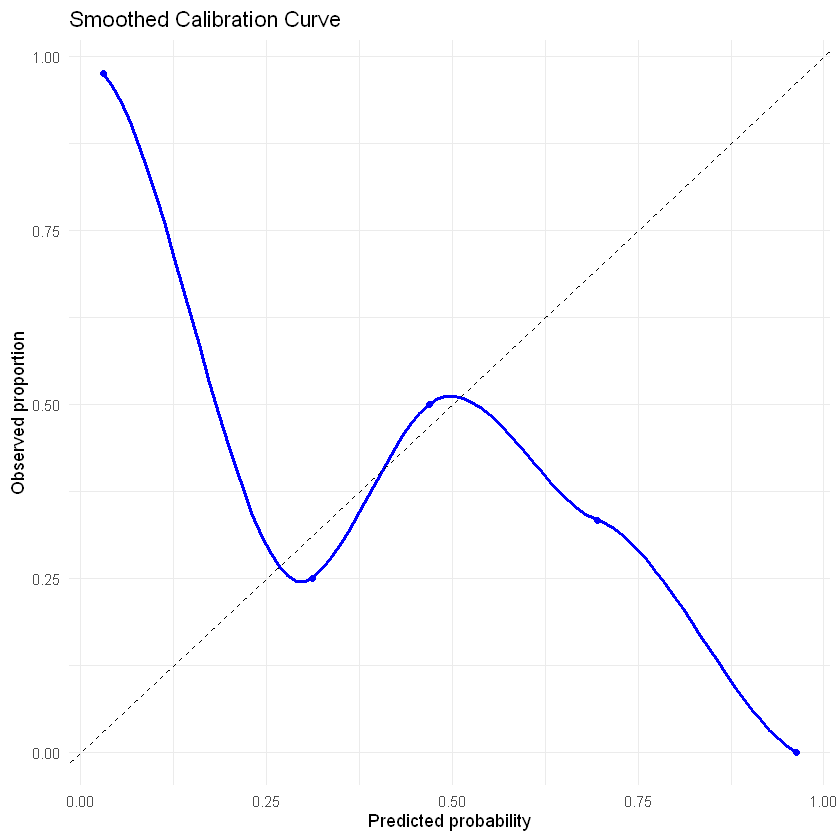

In [28]:
test_data$prob <- prob_class_1

# Giảm số lượng bin để giảm nhiễu
# Dùng bin rộng hơn: chia theo 0.2 thay vì 0.1
bins <- seq(0, 1, by = 0.2)
test_data$bin <- cut(test_data$prob, breaks = bins, include.lowest = TRUE)

# Tính trung bình xác suất dự đoán và xác suất quan sát theo bin
calib <- test_data %>%
  group_by(bin) %>%
  summarise(mean_pred = mean(prob),
            observed = mean(as.numeric(as.character(label))))

# Vẽ đường calibration làm mượt bằng loess
library(ggplot2)
ggplot(calib, aes(x = mean_pred, y = observed)) +
  geom_point(color = "blue") +
  geom_smooth(method = "loess", formula = y ~ x, se = FALSE, color = "blue") +
  geom_abline(slope = 1, intercept = 0, linetype = "dashed") +
  labs(x = "Predicted probability", y = "Observed proportion", title = "Smoothed Calibration Curve") +
  theme_minimal()


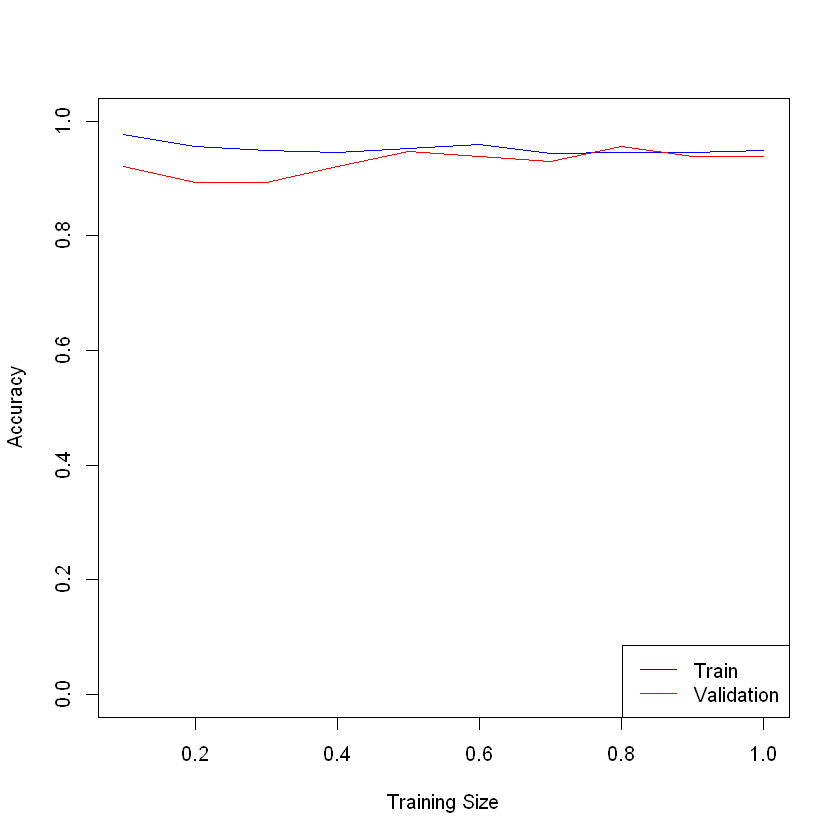

In [29]:
# Learning Curve
train_sizes <- seq(0.1, 1.0, by = 0.1)
train_scores <- c()
val_scores <- c()

set.seed(42)
for (s in train_sizes) {
  idx <- sample(1:nrow(train_data), size = as.integer(s * nrow(train_data)))
  subset <- train_data[idx, ]
  model <- svm(label ~ ., data = subset, kernel = "radial")

  # Explicitly select columns for prediction, excluding 'label'
  feature_cols <- setdiff(colnames(test_data), "label")
  pred_train <- predict(model, subset)
  pred_val <- predict(model, test_data[, feature_cols, with=FALSE]) # Modified line

  train_scores <- c(train_scores, mean(pred_train == subset$label))
  val_scores <- c(val_scores, mean(pred_val == test_data$label))
}

plot(train_sizes, train_scores, type='l', col='blue', ylim=c(0,1), ylab="Accuracy", xlab="Training Size")
lines(train_sizes, val_scores, col='red')
legend("bottomright", legend=c("Train", "Validation"), col=c("blue", "red"), lty=1)

Rows: 569 Columns: 32
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (1): diagnosis
dbl (31): id, radius_mean, texture_mean, perimeter_mean, area_mean, smoothne...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


Calibrated Accuracy: 0.9380531 


Confusion Matrix and Statistics

          Reference
Prediction  0  1
         0 68  4
         1  3 38
                                          
               Accuracy : 0.9381          
                 95% CI : (0.8765, 0.9747)
    No Information Rate : 0.6283          
    P-Value [Acc > NIR] : 1.718e-14       
                                          
                  Kappa : 0.8667          
                                          
 Mcnemar's Test P-Value : 1               
                                          
            Sensitivity : 0.9577          
            Specificity : 0.9048          
         Pos Pred Value : 0.9444          
         Neg Pred Value : 0.9268          
             Prevalence : 0.6283          
         Detection Rate : 0.6018          
   Detection Prevalence : 0.6372          
      Balanced Accuracy : 0.9313          
                                          
       'Positive' Class : 0               
                                    

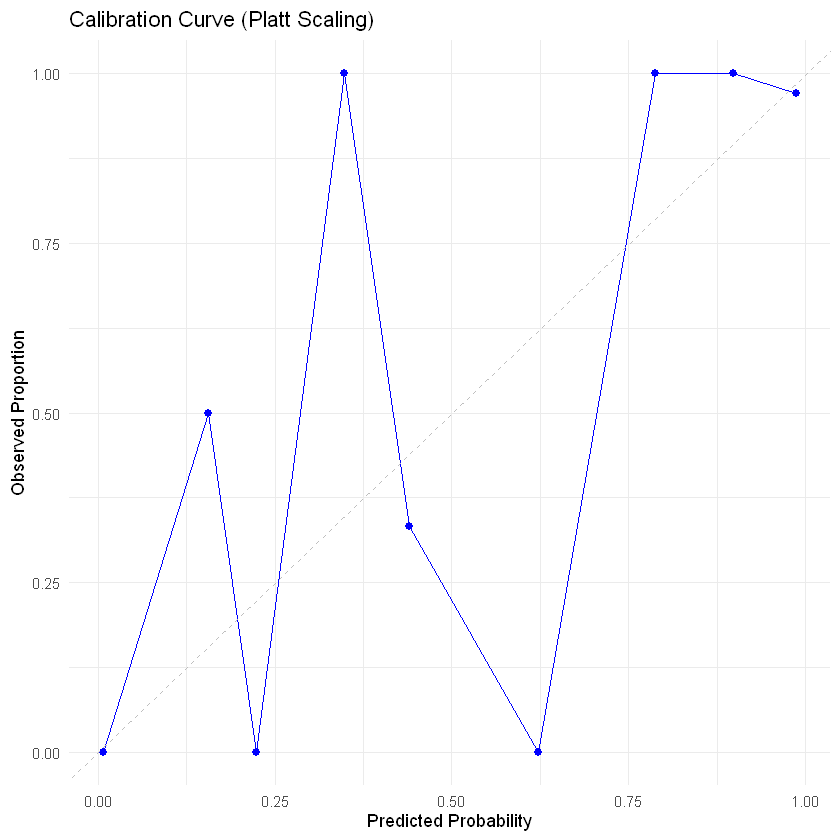

In [30]:
# === Thư viện ===
library(tidyverse)
library(caret)
library(ggplot2)
library(pROC)
library(e1071)           # Cho SVM
library(ROCR)
library(data.table)
library(scales)
library(PRROC)
library(kernlab)

# === Đọc dữ liệu ===
df <- read_csv("D:/Khang/FPT semester/semester_5/DSR301m/project_assignment/attempt/breast-cancer.csv")

# Đổi tên cột diagnosis thành label
df$label <- df$diagnosis
df$diagnosis <- NULL

# Lựa chọn đặc trưng
selected_features <- c(
  'radius_mean', 'perimeter_mean', 'compactness_mean', 'area_mean', 'concavity_mean',
  'concavity_se', 'perimeter_se',  'radius_worst'
)
df <- df[, c(selected_features, "label")]

# Mã hóa nhãn

df$label <- as.factor(ifelse(df$label == "M", 1, 0))

# === Chuẩn hóa ===
features_for_scaling = setdiff(colnames(df), "label")
scaler <- preProcess(df[, features_for_scaling], method = c("center", "scale"))
df_scaled <- predict(scaler, df)
saveRDS(scaler, "scaler_model.rds")

# === Chia train/test ===
set.seed(42)
trainIndex <- createDataPartition(df_scaled$label, p = 0.8, list = FALSE)
train_data <- df_scaled[trainIndex, ]
test_data  <- df_scaled[-trainIndex, ]

# === Huấn luyện SVM ===
svm_model <- svm(label ~ ., data = train_data, kernel = "radial", probability = TRUE)
saveRDS(svm_model, "svm_model.rds")

# === Dự đoán nhãn & decision value ===
svm_decision <- predict(svm_model, test_data %>% select(-label), decision.values = TRUE)
decision_values <- attr(svm_decision, "decision.values")
true_labels <- as.numeric(test_data$label == 1)

# === Platt scaling ===
platt_model <- glm(true_labels ~ decision_values, family = binomial)
calibrated_probs <- predict(platt_model, type = "response")

# === Vẽ Calibration Curve ===
calibration_df <- data.frame(
  predicted = calibrated_probs,
  actual = true_labels
)

calibration_plot_data <- calibration_df %>%
  mutate(bin = cut(predicted, breaks = seq(0, 1, 0.1), include.lowest = TRUE)) %>%
  group_by(bin) %>%
  summarise(
    mean_predicted = mean(predicted),
    mean_actual = mean(actual),
    .groups = 'drop'
  )

# Plot
calibration_plot <- ggplot(calibration_plot_data, aes(x = mean_predicted, y = mean_actual)) +
  geom_line(color = "blue") +
  geom_point(color = "blue", size = 2) +
  geom_abline(slope = 1, intercept = 0, linetype = "dashed", color = "gray") +
  labs(title = "Calibration Curve (Platt Scaling)",
       x = "Predicted Probability",
       y = "Observed Proportion") +
  theme_minimal()

print(calibration_plot)

# === Đánh giá Accuracy ===
pred_labels <- ifelse(calibrated_probs > 0.5, 1, 0)
accuracy <- mean(pred_labels == true_labels)
cat("Calibrated Accuracy:", accuracy, "\n")

# === Ma trận nhầm lẫn ===
confusionMatrix(as.factor(pred_labels), as.factor(true_labels))
